# Домашнее задание 3

1) [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

1) [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

2) [3 балла] Реализуйте приведение изображения листка к "виду сверху"

3) [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

4) [3 балла] Доп. задача 1: Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

5) [5 баллов] Доп. задача 2: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

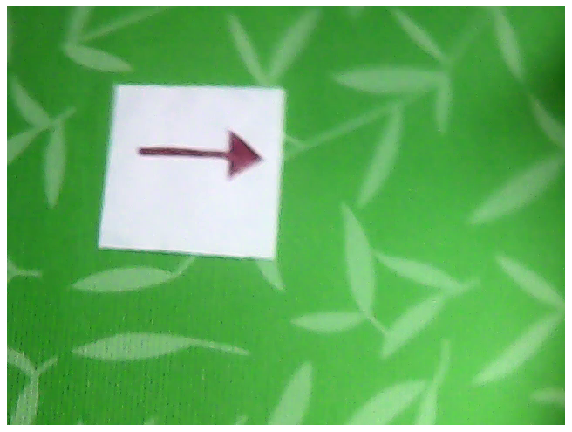

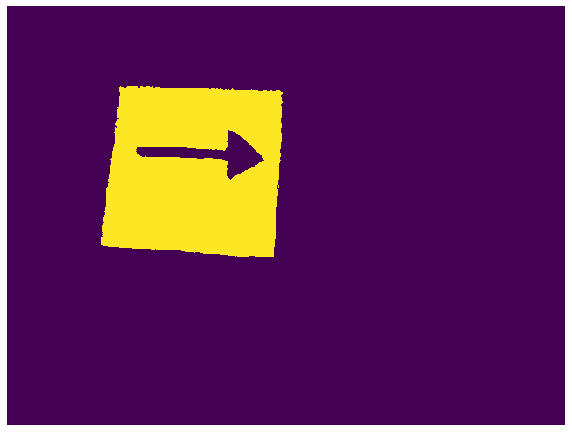

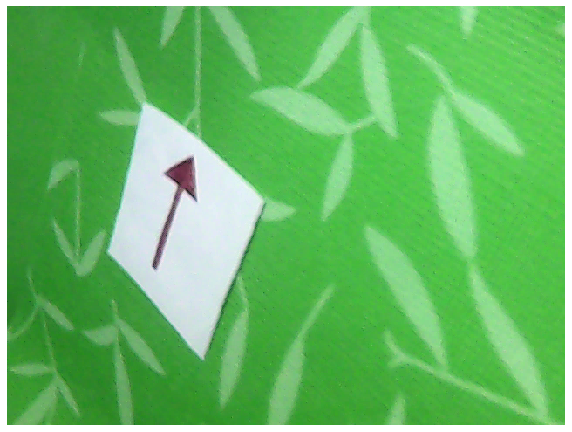

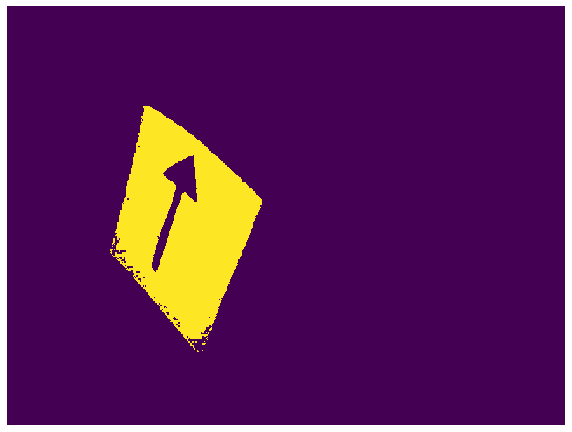

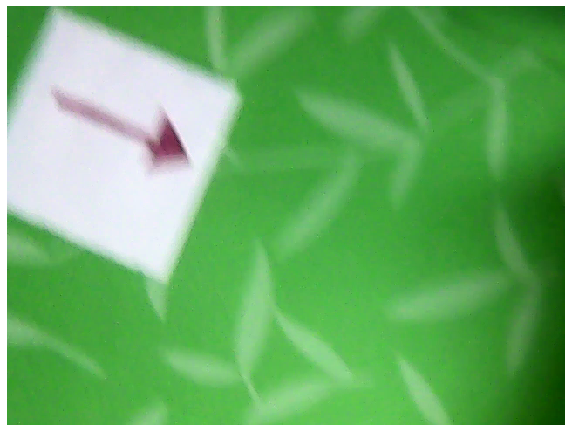

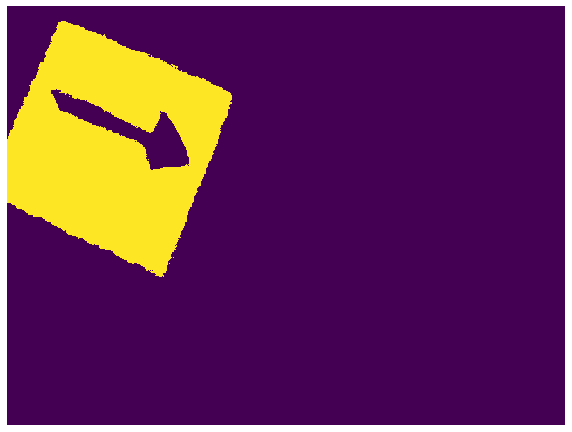

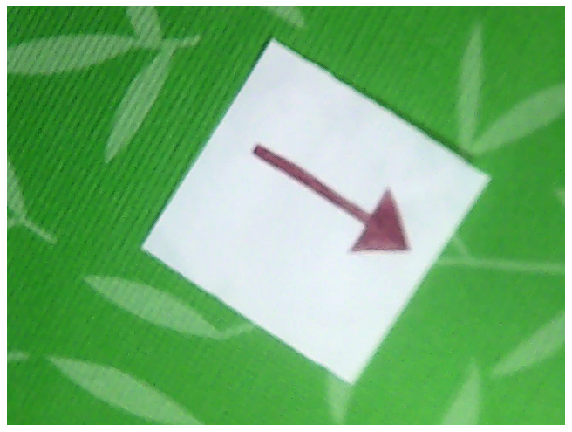

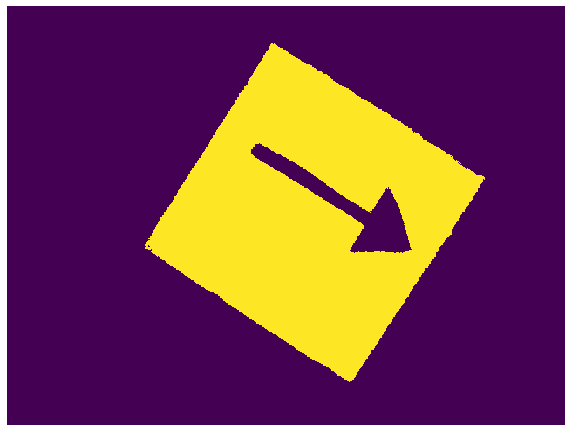

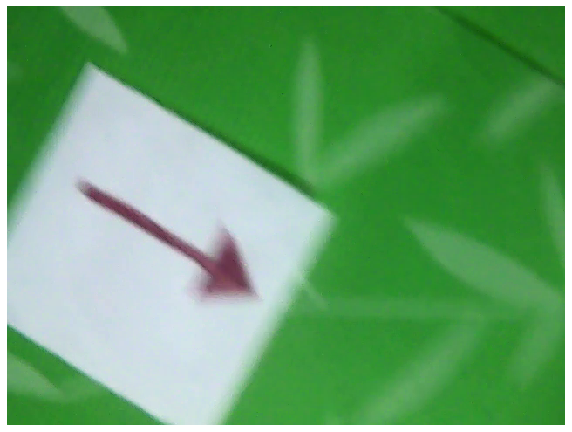

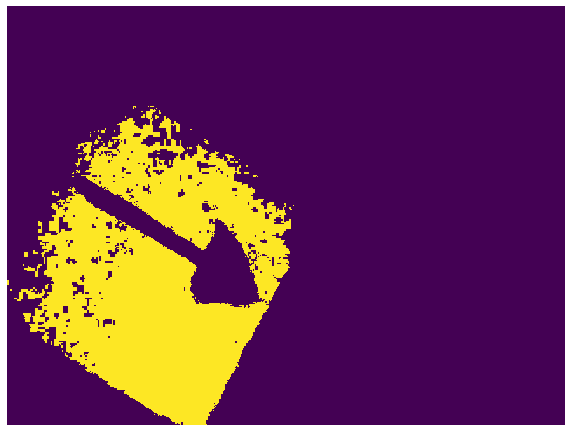

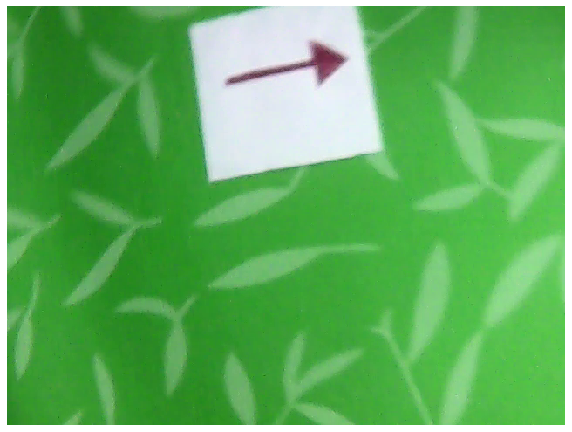

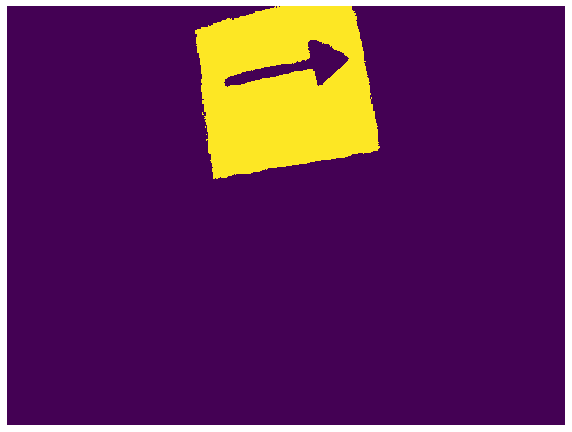

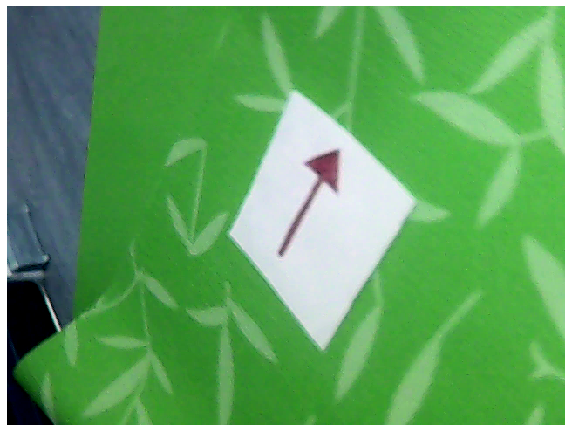

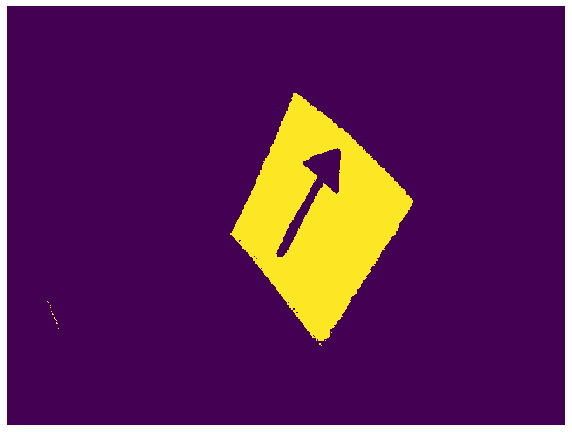

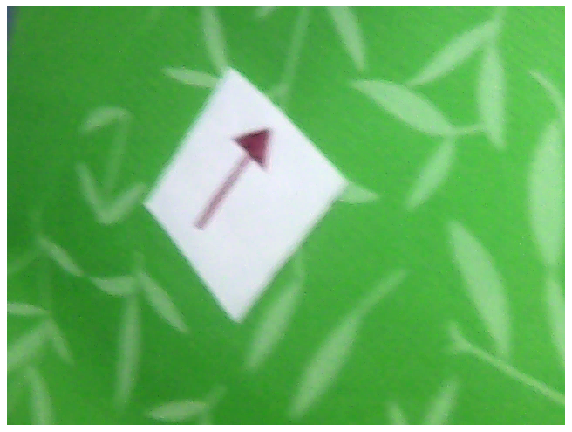

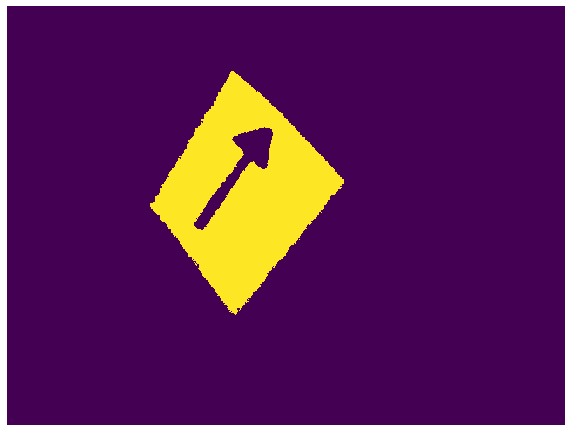

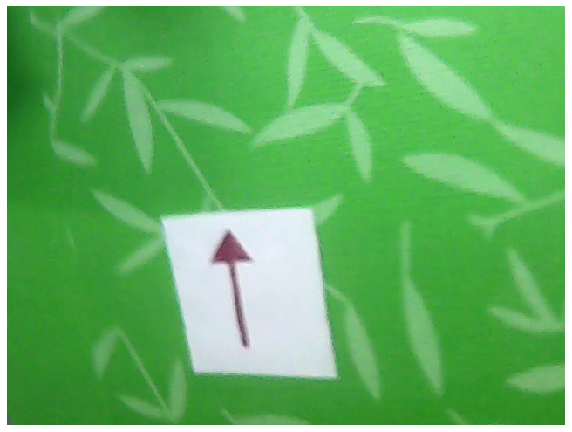

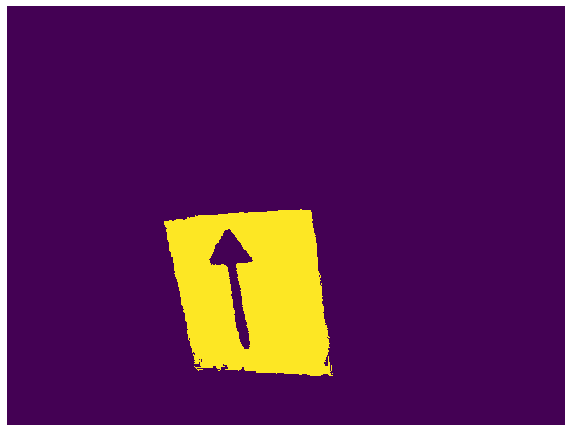

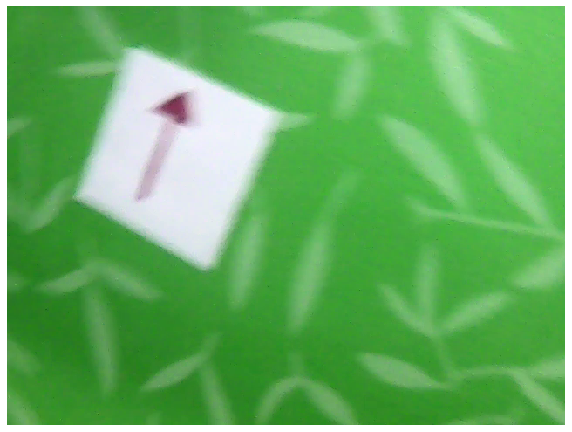

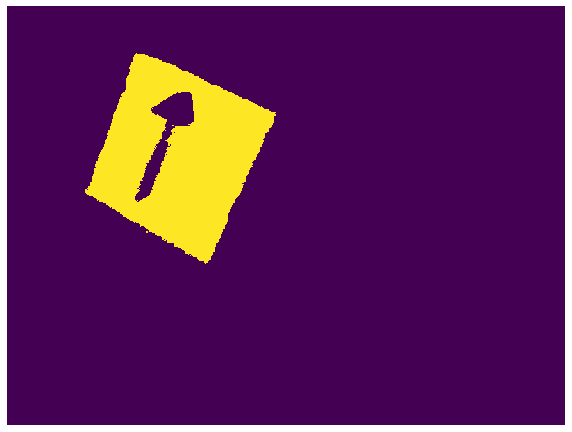

In [8]:
import numpy as np
import cv2
import time
import os
import math
import glob
import sys
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

images = glob.glob('../data/imgs/arrow/*.png')

for f in images:
    img = cv2.imread(f)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

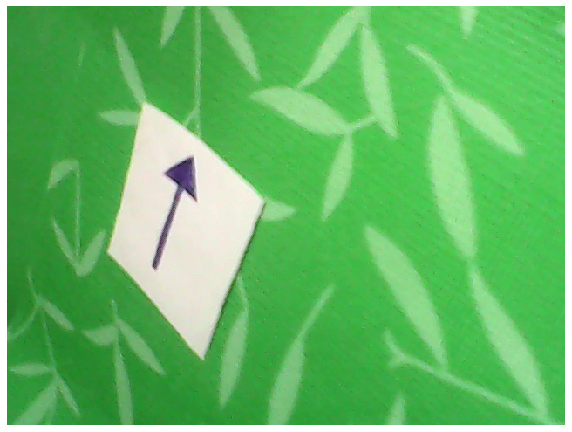

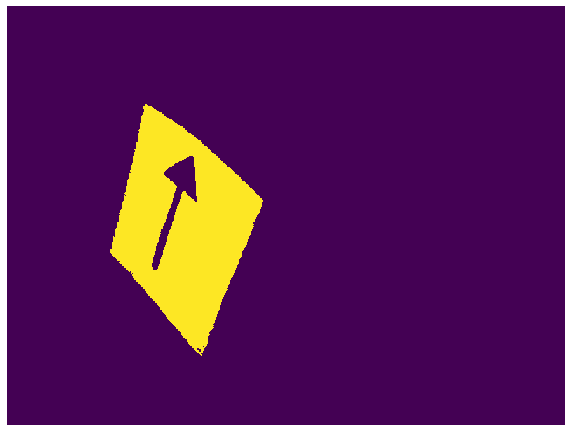

In [148]:
img = cv2.imread('../data/imgs/arrow/vlcsnap-2020-10-21-18h01m22s212.png', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

low_th  = (190, 190, 190)
high_th = (255, 255, 255)

mask = cv2.inRange(img, low_th, high_th)

plt.imshow(mask)
plt.axis('off')
plt.show()

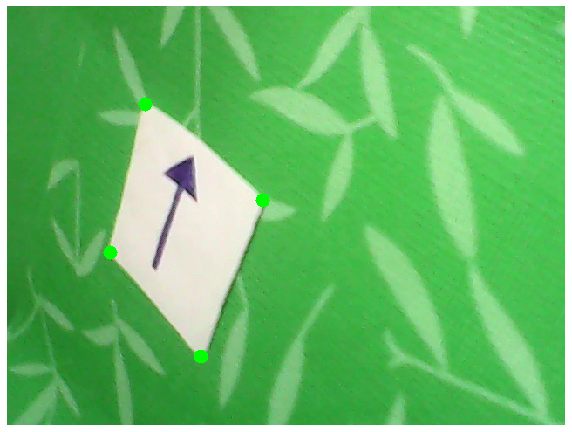

In [149]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [c for c in contours if cv2.arcLength(c, True) > 100]
cnt = contours[0]

approx = cv2.convexHull(cnt)

epsilon = 0.05 * cv2.arcLength(approx, True)

approx = cv2.approxPolyDP(approx, epsilon, True)

contour_marked = cv2.drawContours(img_rgb, approx, -1, (0, 255, 0), 15)

plt.imshow(contour_marked)
plt.axis('off')
plt.show()

In [150]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    return rect

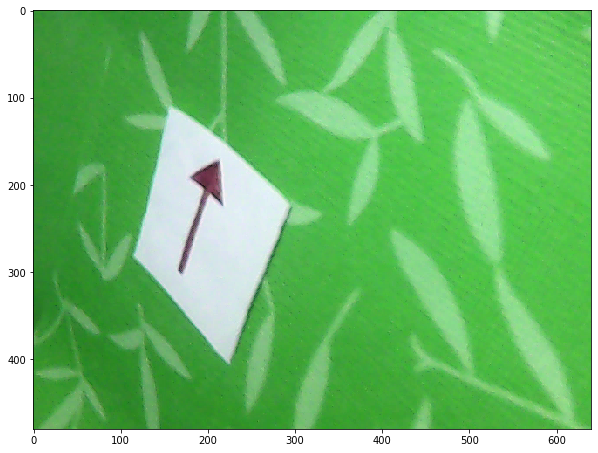

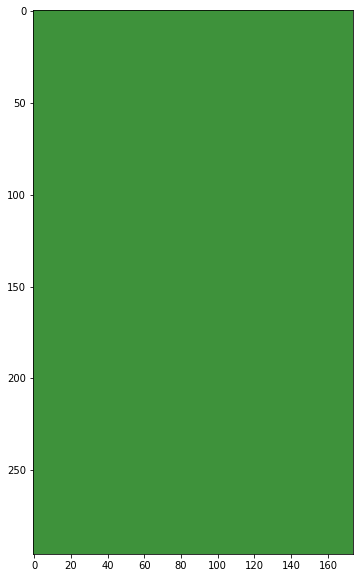

In [151]:
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")
    
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    
    return warped

warped = four_point_transform(img, np.asarray(approx)[:, 0, :])

plt.imshow(img)
# plt.axis('off')
plt.show()

plt.imshow(warped)
# plt.axis('off')
plt.show()

In [152]:
def bird_eye_transform(img):
    # Mask
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    low_th  = (190, 190, 190)
    high_th = (255, 255, 255)

    mask = cv2.inRange(img, low_th, high_th)
    
    # Contours
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if cv2.arcLength(c, True) > 100]
    cnt = contours[0]

    approx = cv2.convexHull(cnt)

    epsilon = 0.05 * cv2.arcLength(approx, True)

    approx = cv2.approxPolyDP(approx, epsilon, True)

    contour_marked = cv2.drawContours(img_rgb, approx, -1, (0, 255, 0), 15)
    
    warped = four_point_transform(img, np.asarray(approx)[:, 0, :])

    plt.imshow(img)
    # plt.axis('off')
    plt.show()

    plt.imshow(warped)
    # plt.axis('off')
    plt.show()


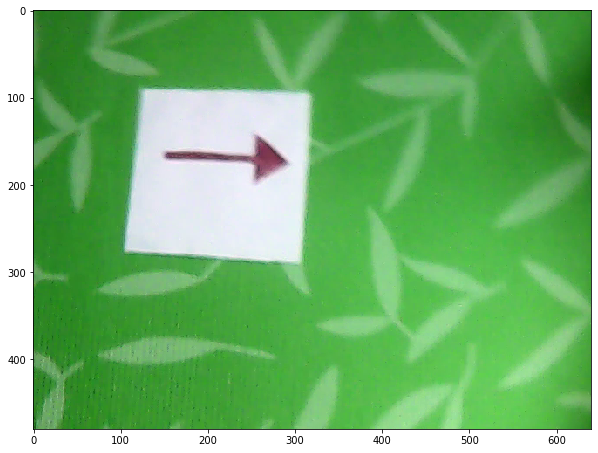

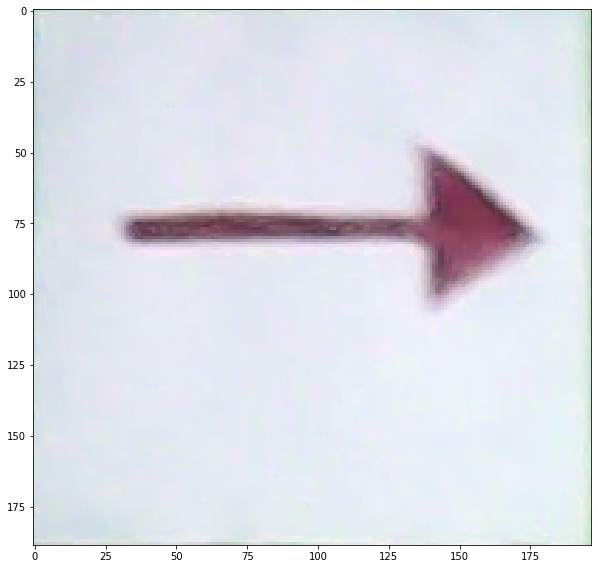

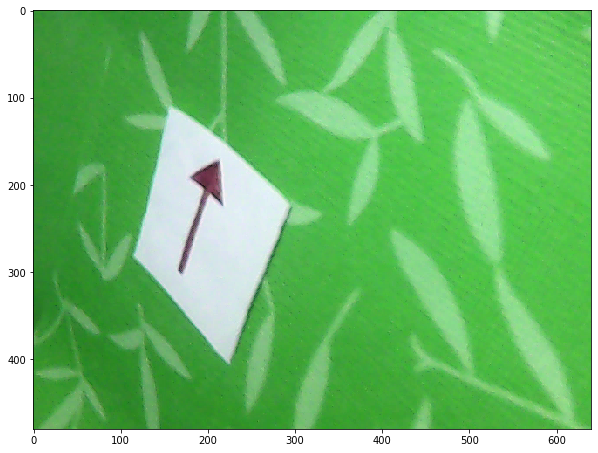

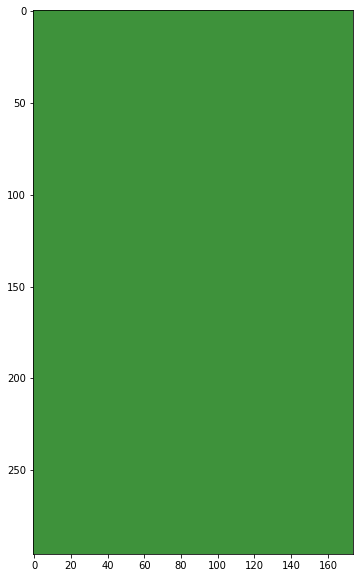

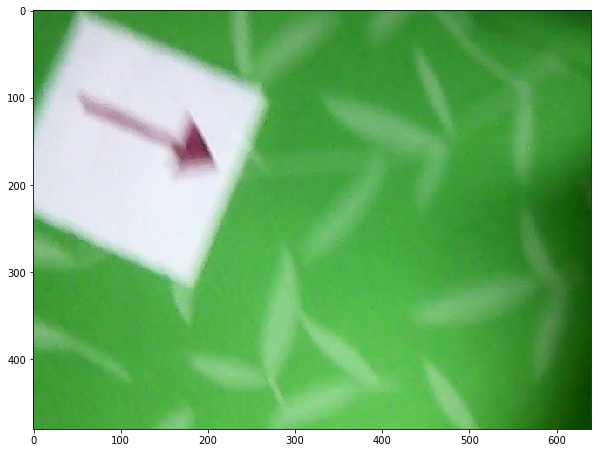

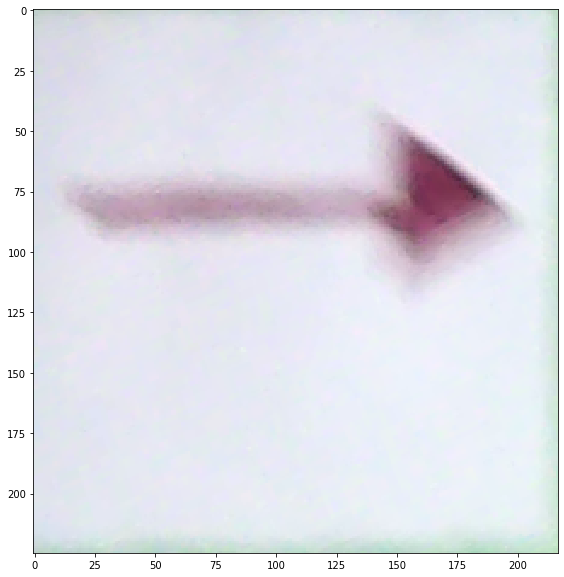

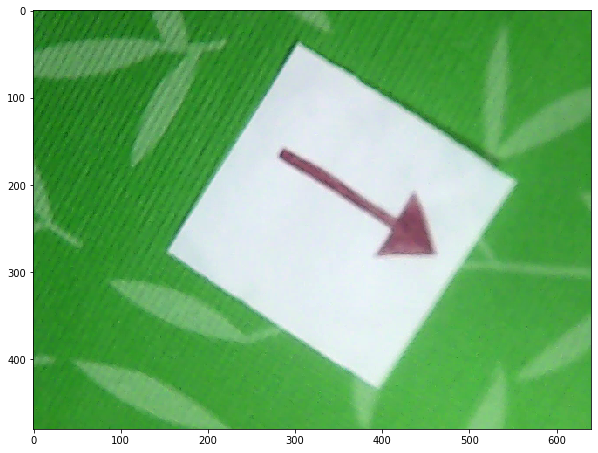

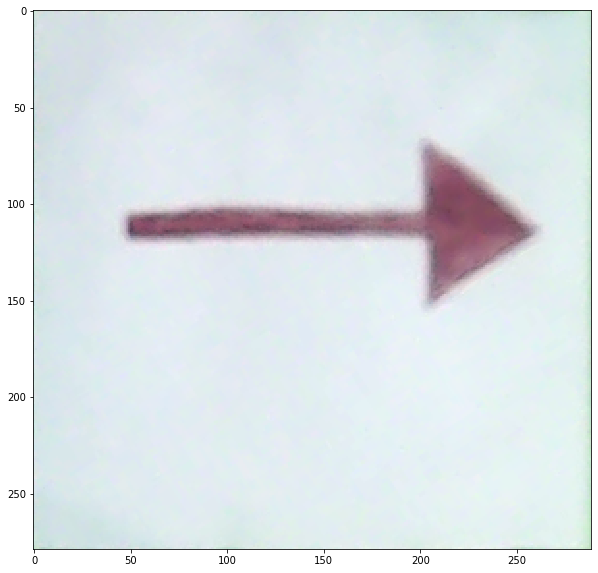

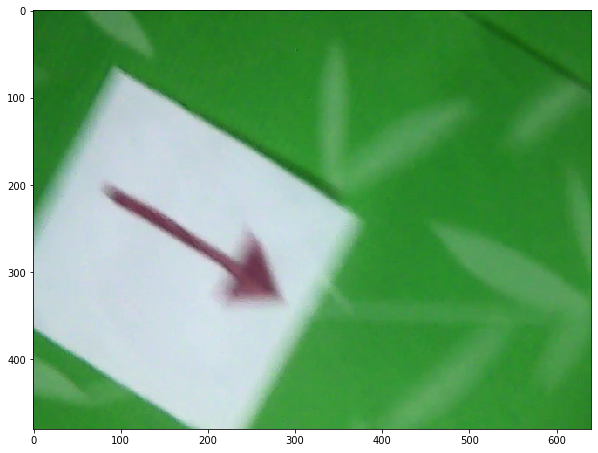

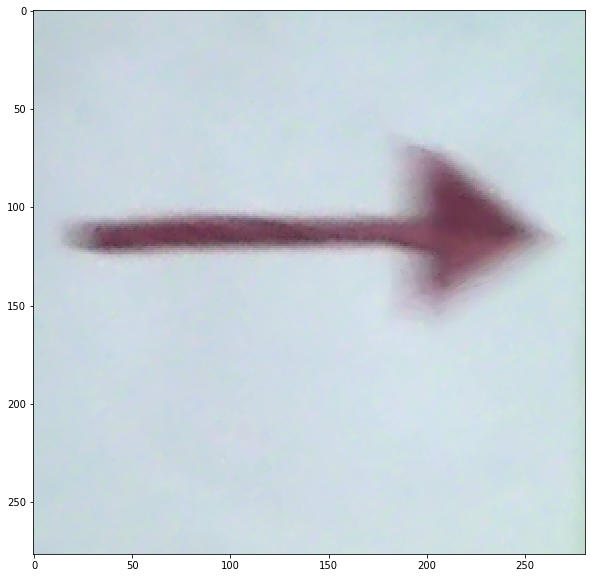

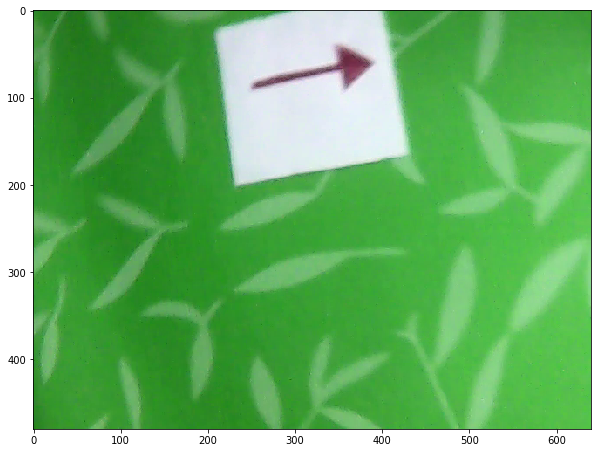

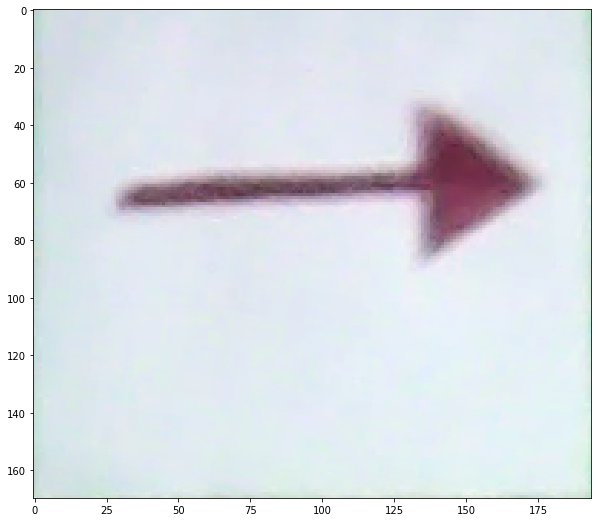

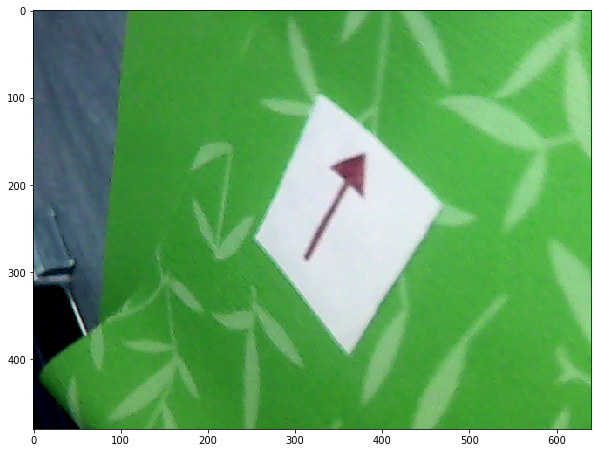

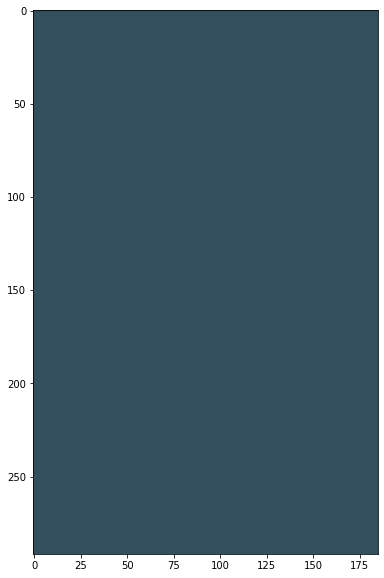

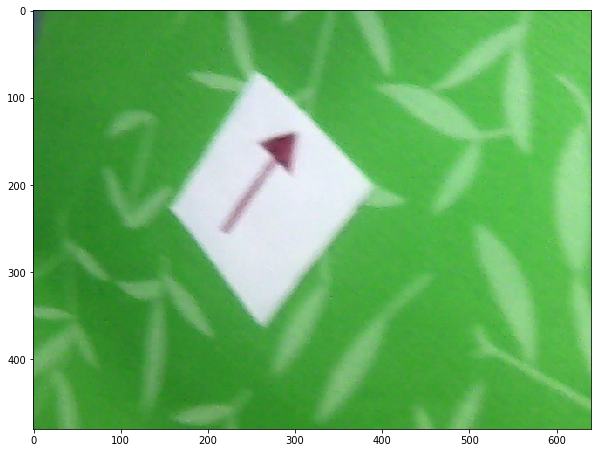

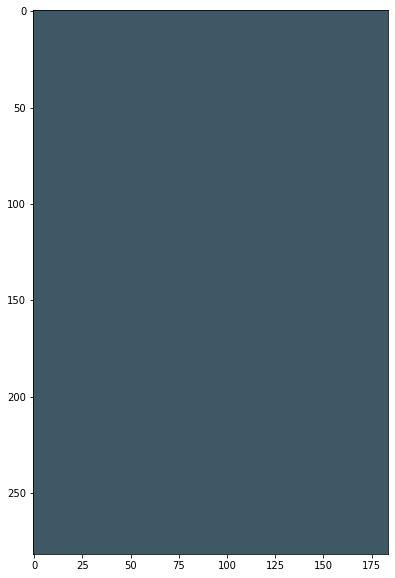

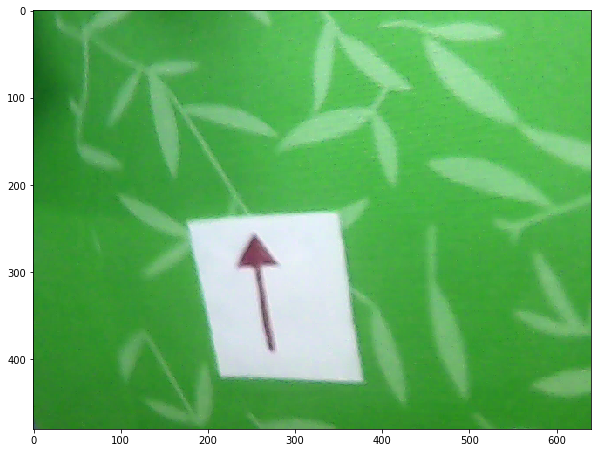

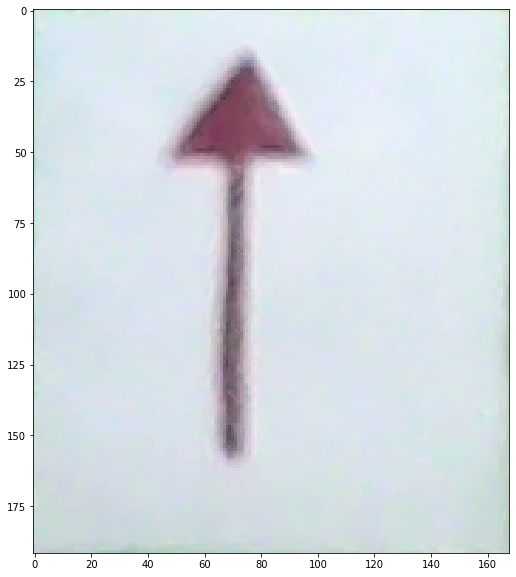

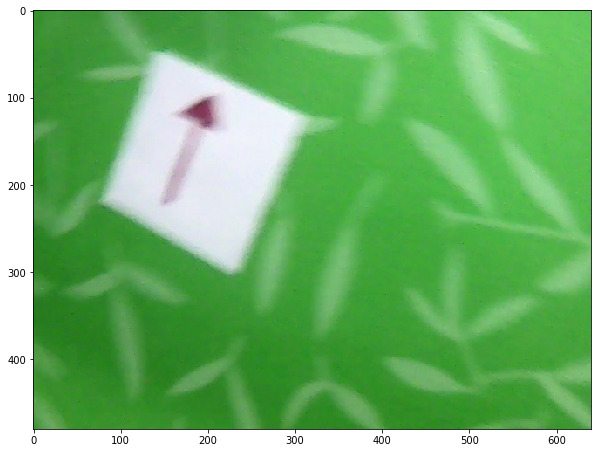

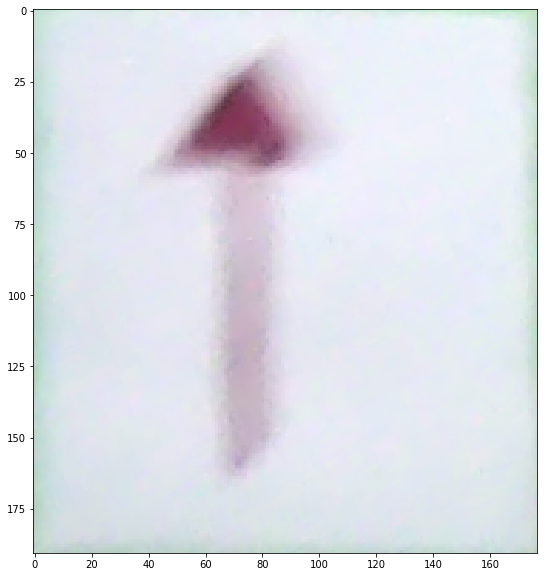

In [138]:
for f in images:
    img = cv2.imread(f)
    bird_eye_transform(img)

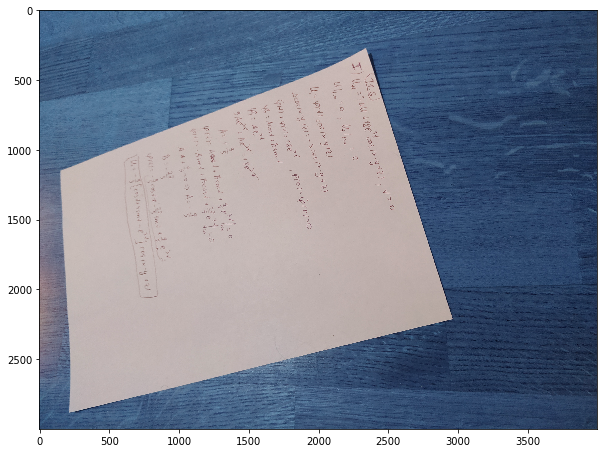

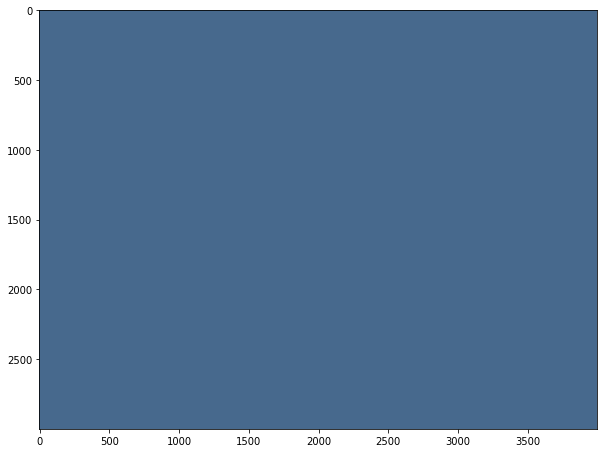

In [139]:
image = cv2.imread('../data/imgs/arrow/image.jpg', cv2.IMREAD_COLOR)
bird_eye_transform(image)